# ML-MAJOR-JUNE-ML064B10

### Predict the first Innings score in a ODI

1. Load the dataset from the csv file.<br>
2. Use “groupby” operation, to find the average number of runs, scored by each country,and represent it on a bar graph.<br>
3. Handle Missing values:<br>
a. If there are null values in continuous numerical column, replace the null values by the mean of that column<br>
b. If there are null values in ordinal numerical column, replace the null values by the mode of that column<br>
c. If there are null values in categorical column, replace the null values by the mode of that column<br>
d. If more than 50%the values in a column are null, then drop that entire column<br>
4. Remove the columns, that you think, do not contribute to the total score, in the first innings.<br>
5. Convert the categorical columns (if any), to numeric, using one hot encoding/ dummy encoding.<br>
6. Pick “total” column, as the target variable<br>
7. Select the relevant features.<br>
8. Perform train-test-split<br>
9. Perform Feature scaling<br>
10. Use<br>
a. Use Linear Regression<br>
b. Use Decision Tree Regression<br>
c. Use Random Forest Regression<br>
11. Evaluate the model<br>
12. Apply prediction<br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### 1. Load the dataset from the csv file

In [2]:
df = pd.read_csv('odi.csv')

In [3]:
df.head()

,mid,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,runs_last_5,wickets_last_5,striker,non-striker,total
0,1,6/13/2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,0,0,301
1,1,6/13/2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,0,0,301
2,1,6/13/2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,4,0,0,0,301
3,1,6/13/2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.4,6,0,0,0,301
4,1,6/13/2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,6,0,0.5,6,0,0,0,301


#### 2.Use “groupby” operation, to find the average number of runs, scored by each country,and represent it on a bar graph

In [4]:
avg_runs = df.groupby('bat_team')['total'].mean()
avg_runs

bat_team
Afghanistan             231.294685
Asia XI                 328.396146
Australia               274.583853
Bangladesh              232.174770
Bermuda                 189.269796
Canada                  198.460931
England                 266.261576
Hong Kong               226.456686
India                   277.261732
Ireland                 228.572055
Kenya                   183.188172
Netherlands             202.668044
New Zealand             267.911250
Pakistan                256.961905
Papua New Guinea        201.000000
Scotland                224.372319
South Africa            282.738377
Sri Lanka               254.554023
United Arab Emirates    224.057827
West Indies             237.371397
Zimbabwe                206.446338
Name: total, dtype: float64

In [5]:
country = sorted(df['bat_team'].unique())
country

['Afghanistan',
 'Asia XI',
 'Australia',
 'Bangladesh',
 'Bermuda',
 'Canada',
 'England',
 'Hong Kong',
 'India',
 'Ireland',
 'Kenya',
 'Netherlands',
 'New Zealand',
 'Pakistan',
 'Papua New Guinea',
 'Scotland',
 'South Africa',
 'Sri Lanka',
 'United Arab Emirates',
 'West Indies',
 'Zimbabwe']

#### Bar Graph

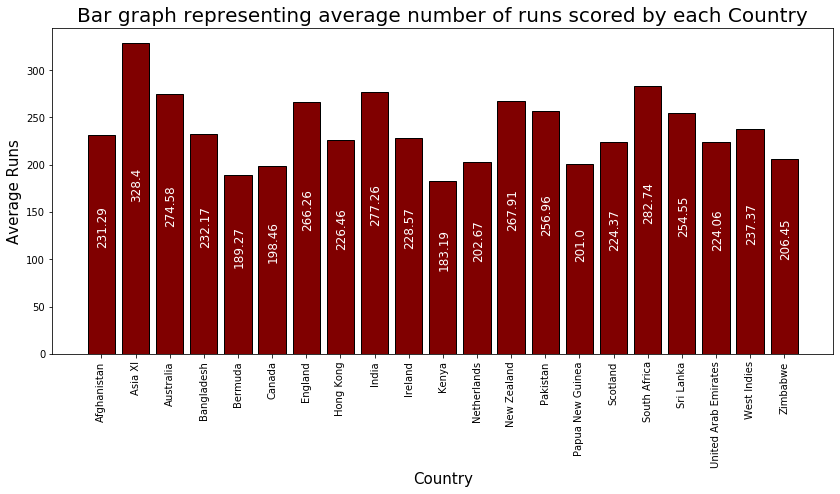

In [6]:
x = country
y = avg_runs
fig = plt.figure(figsize=(14,6))
plt.title("Bar graph representing average number of runs scored by each Country",fontsize=20)
plt.bar(x,y, color='maroon',width=0.8,ec='black')
plt.xlabel('Country',fontsize=15)
plt.ylabel('Average Runs',fontsize=15)
plt.xticks(rotation=90)
for index,value in enumerate(y):
    plt.text(index-0.15, value/2, str(round(value,2)), color='white', rotation=90, size=12)
plt.show()

#### 3. Handle Missing values

In [7]:
df.isna().sum()

mid               0
date              0
venue             0
bat_team          0
bowl_team         0
batsman           0
bowler            0
runs              0
wickets           0
overs             0
runs_last_5       0
wickets_last_5    0
striker           0
non-striker       0
total             0
dtype: int64

#### No null data present in the dataset  !!

#### 4. Remove the columns, that you think, do not contribute to the total score, in the first innings

In [8]:
df1 = df.drop(['mid','runs_last_5','wickets_last_5'],axis=1)
df1.head(3)    #Removing the 'mid','runs_last_5','wickets_last_5' columns

,date,venue,bat_team,bowl_team,batsman,bowler,runs,wickets,overs,striker,non-striker,total
0,6/13/2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.1,0,0,301
1,6/13/2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,0,0,0.2,0,0,301
2,6/13/2006,"Civil Service Cricket Club, Stormont",England,Ireland,ME Trescothick,DT Johnston,4,0,0.3,0,0,301


#### 5. Convert the categorical columns (if any), to numeric, using one hot encoding/ dummy encoding

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350899 entries, 0 to 350898
Data columns (total 12 columns):
date           350899 non-null object
venue          350899 non-null object
bat_team       350899 non-null object
bowl_team      350899 non-null object
batsman        350899 non-null object
bowler         350899 non-null object
runs           350899 non-null int64
wickets        350899 non-null int64
overs          350899 non-null float64
striker        350899 non-null int64
non-striker    350899 non-null int64
total          350899 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 32.1+ MB


In [10]:
#date to ordinal
import datetime as dt
df1["date"]=pd.to_datetime(df1["date"])
df1["date"]=df1["date"].map(dt.datetime.toordinal)

In [11]:
#dummy encoding
df2 = pd.get_dummies(df1)
df2.head()

,date,runs,wickets,overs,striker,non-striker,total,venue_AMI Stadium,venue_Adelaide Oval,venue_Andhra Cricket Association-Visakhapatnam District Cricket Association Stadium,...,bowler_Younis Khan,bowler_Yuvraj Singh,bowler_Z Khan,bowler_Zaheer Maqsood,bowler_Zahid Hussain,bowler_Zahid Shah,bowler_Zahoor Khan,bowler_Zain Abbas,bowler_Ziaur Rahman,bowler_Zulfiqar Babar
0,732475,0,0,0.1,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,732475,0,0,0.2,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,732475,4,0,0.3,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,732475,6,0,0.4,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,732475,6,0,0.5,0,0,301,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### 6. Pick “total” column, as the target variable

In [12]:
y = df2['total']

####  7. Select the relevant features.

In [13]:
x = df2.drop(['total'],axis=1)

#### 8. Perform train-test-split

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### 9. Perform Feature scaling

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### 10. a. Use Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### 10. b. Use Decision Tree Regression

In [17]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor( random_state=0 )
dt.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=0, splitter='best')

#### 10. c. Use Random Forest Regression

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

#### 11. Evaluate the model

In [19]:
from sklearn.metrics import confusion_matrix

Linear Regression model

In [22]:
lr_pred = lr.predict(x_test)
from sklearn.metrics import mean_squared_error
lr_error = mean_squared_error(y_test, lr_pred)
lr_error = np.log(lr_error)
print("Mean squared error :",lr_error)
print("Train Score : ",lr.score(x_train,y_train))
print("Test Score : ", lr.score(x_test,y_test))

Mean squared error : 56.89582377336146
Train Score :  0.6817504753959682
Test Score :  -1.3188152553571974e+21


Decision Tree model

In [23]:
print("Train Score : ", dt.score(x_train,y_train))
print("Test Score : ", dt.score(x_test,y_test))

Train Score :  1.0
Test Score :  0.983056341677952


Random Forest model

In [24]:
print("Train Score : ", rf.score(x_train,y_train))
print("Test Score : ", rf.score(x_test,y_test))

Train Score :  0.998040855007197
Test Score :  0.991394154433276


#### 12. Apply prediction

Linear Regression

In [25]:
print(lr_pred)

[293.7475644  322.5444394  240.29834565 ... 268.4428769  254.8569394
 276.77490815]


Decision Tree

In [26]:
dt_pred = dt.predict(x_test)
print(dt_pred)

[303. 332. 253. ... 260. 249. 294.]


Random Forest

In [27]:
rf_pred = rf.predict(x_test)
print(rf_pred)

[314.7 331.3 253.  ... 270.  249.  294. ]


### End